## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [63]:
### YOUR CODE HERE ###
import pandas as pd
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
con = psycopg2.connect(
  dbname="db_ds_students", 
  user="readonly", 
  password="6hajV34RTQfmxhS", 
  host="dsstudents.skillbox.ru", 
  port="5432"
)
sql = "select * from exploratory;"
dat = pd.read_sql_query('select * from exploratory',con=con)
print(dat.columns)
dat.head()

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'], dtype='object')


,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


In [84]:
dat = dat.replace(r'\s+','',regex=True)
dat = dat.apply(pd.to_numeric)

-30.42489590734615

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

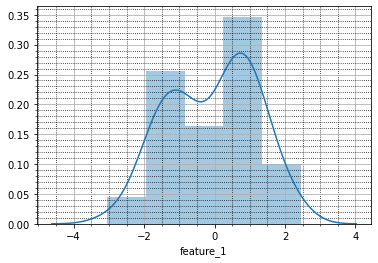

In [85]:
### YOUR CODE HERE ###
sns.distplot(dat['feature_1'], bins=5)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Около трети всех значений находится в границах 0.2-1.2, четверть - -2--1

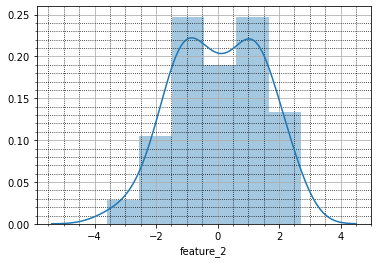

In [86]:
### YOUR CODE HERE ###
sns.distplot(dat['feature_2'], bins=6)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Больше половины всех значений лежит в пределах -1.5 - 1.5

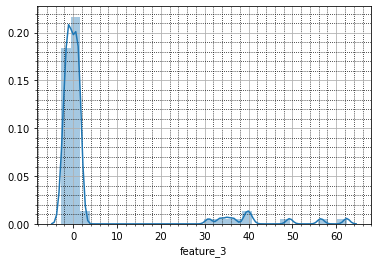

In [87]:
### YOUR CODE HERE ###
sns.distplot(dat['feature_3'], bins=30)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Почти все значения лежат в пределах -2 - 2

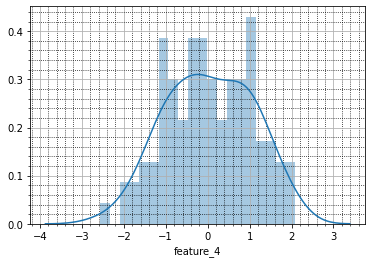

In [88]:
### YOUR CODE HERE ###
sns.distplot(dat['feature_4'], bins=20)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Больше половины всех значений лежат в пределах -1.2 - 1.2

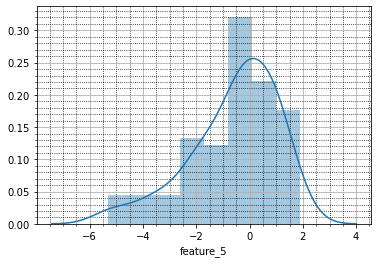

In [89]:
### YOUR CODE HERE ###
sns.distplot(dat['feature_5'], bins=8)
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', color = 'k', linestyle = ':')

Треть всех значений - -0.8 - 0, еще половина - 0 - 2

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

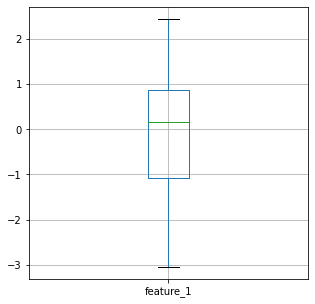

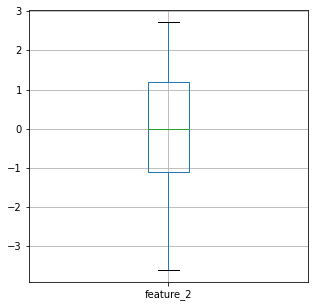

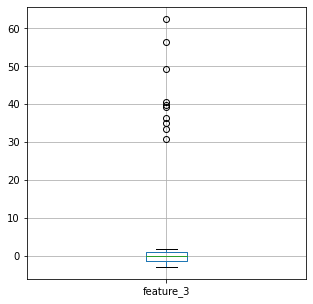

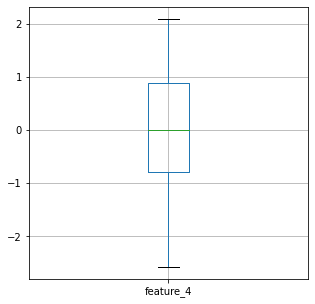

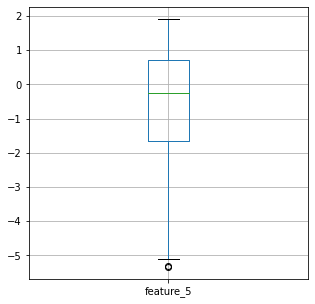

In [99]:
for i in range(1,6):
    fig = plt.figure(figsize=(5, 5))
    dat.boxplot(column=f'feature_{i}')

feature_1: Судя по графику симметрия в распределении неидеальна, а именно большинство значений > 0 (зеленая выше нуля), но отрицательные больше по величине из-за чего ящик и нижний "ус" более длинные
feature_2: Медиана = 0, отрицательные чуть больше по величине, положительных чуть больше самих по себе, из-за чего нижний "ус" более длинный и вниз от среднего ящик чуть больше
feature_3: Из-за экстремальных значений сложно сказать о самом ящике.
feature_4: Минимальное по модулю больше максимального
feature_5: Большой выброс значений в отрицательной зоне, неравномерно распределение, что мы видим по расположению медианы и ширины ящика.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [91]:
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression
x = dat[['feature_1', 'feature_2', 'feature_3', 'feature_5']]
y = dat['feature_4']
reg = LinearRegression().fit(x, y)
print(reg.intercept_,reg.coef_)

-2.498001805406602e-16 [-2.22273811e-01  6.35066657e-01  0.00000000e+00 -3.53883589e-16]


У всех выборок большинство значений от -2 до 2, соответственно все коэф у "действительно" зависимых значений будет порядка 0.1-1. 
0.00000000e+00 и -3.53883589e-16 по сути равны 0, поэтому 4 столбец не зависит от 3-го и 5-го, как и от свободного коэф (-2.498001805406602e-16)

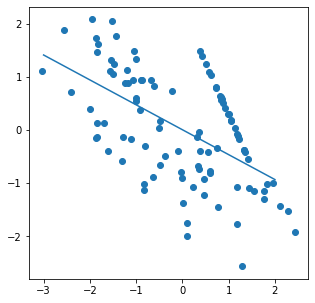

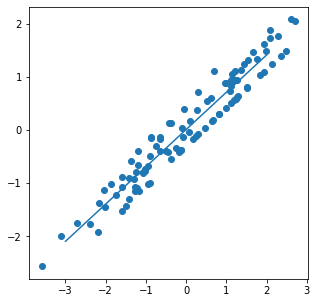

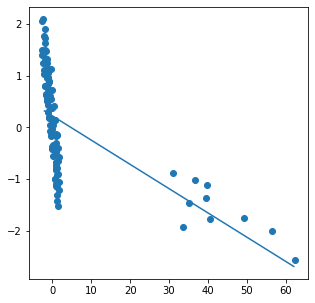

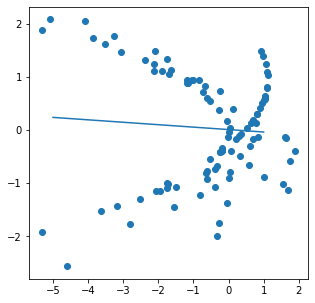

In [100]:
for i in [1,2,3,5]:
    x = dat[[f'feature_{i}']]
    y = dat['feature_4'] 
    reg = LinearRegression().fit(x, y)
    x1 = int(dat[f'feature_{i}'].min())
    x2 = int(dat[f'feature_{i}'].max())
    y1 = reg.intercept_ + reg.coef_[0]*x1
    y2 = reg.intercept_ + reg.coef_[0]*x2
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    ax.scatter(dat[f'feature_{i}'], dat['feature_4'])
    ax.plot([x1, x2], [y1, y2])

По графикам видно, что для feature_3 и feature_5 наклонные почти горизонтальны (при рассмотрении учитываем масштаб осей), мало влияют на feature_4. feature_1 и feature_2 сильно влияют, что видно в наклоне